# Kokoro Imafuku

# **What are the salary levels of workers in the United States and Canada?**

#### Sub Questions:

- In comparison to workers in these North American countries, how much do workers in other countries earn?
- What are the salary levels of workers in other continents like Asia, Europe, South America, and Africa?


In recent years, the impression is that tech industries in North American countries, especially the United States, pay a higher salary to their workers than in other countries. I would like to deconstruct this idea and see if there is an existing relationship between the location of the company and salary in USD. I plan to do this by analyzing the company_location column, and the salary_in_usd column to see the different salary levels in different countries. I would categorize each country, and get the average salary of the workers in that country. I would also graph the different salaries in certain countries, and get both the high and the low-end salaries in that country. Furthermore, I would also analyze the different experience levels, to see if workers of a certain experience level are more likely to work in a certain company_location. 

In [1]:
#load file
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/processed/ds_salaries_1.csv')

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_region
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Latin America
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,North America
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,North America
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,North America
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,North America


## 1. Summary of dataset

Descibe the dataset of all columns

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [3]:
df.describe(exclude = 'number').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326
company_region,607,7,North America,385


## 2. Drop unecessary columns from the dataset

I will drop the columns: 'work_year', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_size', 'experience_level', 'salary_currency', 'salary' as I will not need them answering my research question. I will then assign the modified dataset as dfWorld for understandability. 


In [4]:
dfWorld = df.drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_size', 'experience_level', 'salary_currency', 'salary'])
dfWorld

,salary_in_usd,company_location,company_region
0,79833,DE,Europe
1,260000,JP,Asia
2,109024,GB,Europe
3,20000,HN,Latin America
4,150000,US,North America
...,...,...,...
602,154000,US,North America
603,126000,US,North America
604,129000,US,North America
605,150000,US,North America


## 3. Create dataset for each continent

For simplicity, I have used five continents to categorize all the countries listed on the original dataset. I have included Middle East and Oceania continent as Asia. 
I have also used the head() method to each dataframe for formatting reasons.

In [5]:
dfNorthAmerica = dfWorld.loc[(df["company_region"] == "North America")]

dfAsia = dfWorld.loc[(df['company_region'] == "Asia") | (df['company_region'] == "Middle East") | (df['company_region'] == "Oceania")]

dfEurope = dfWorld.loc[(df['company_region'] == "Europe")]

dfLatinAmerica = dfWorld.loc[(df['company_region'] == "Latin America")]

dfAfrica = dfWorld.loc[(df['company_region'] == "Africa")]

dfNorthAmerica.head()


,salary_in_usd,company_location,company_region
4,150000,US,North America
5,72000,US,North America
6,190000,US,North America
8,135000,US,North America
13,87000,US,North America


In [6]:
dfAsia.head()

,salary_in_usd,company_location,company_region
1,260000,JP,Asia
9,125000,NZ,Oceania
11,40481,IN,Asia
15,8000,PK,Asia
16,41689,JP,Asia


In [7]:
dfEurope.head()

,salary_in_usd,company_location,company_region
0,79833,DE,Europe
2,109024,GB,Europe
7,35735,HU,Europe
10,51321,FR,Europe
12,39916,FR,Europe


In [8]:
dfLatinAmerica.head()

,salary_in_usd,company_location,company_region
3,20000,HN,Latin America
27,33511,MX,Latin America
133,24000,BR,Latin America
176,2859,MX,Latin America
177,40038,CL,Latin America


In [9]:
dfAfrica

,salary_in_usd,company_location,company_region
38,10000,NG,Africa
116,50000,NG,Africa
196,9272,KE,Africa
487,100000,DZ,Africa


## 4. Plot each dataframe

#### RQ1: What are the salary levels of workers in the United States and Canada? 

Mean of all salaries in North America:

In [10]:
dfMeanNorthAmerica = dfNorthAmerica.groupby('company_location').mean().reset_index()

dfMeanNorthAmerica

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/3066942484.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMeanNorthAmerica = dfNorthAmerica.groupby('company_location').mean().reset_index()


,company_location,salary_in_usd
0,CA,99823.733333
1,US,144055.261972


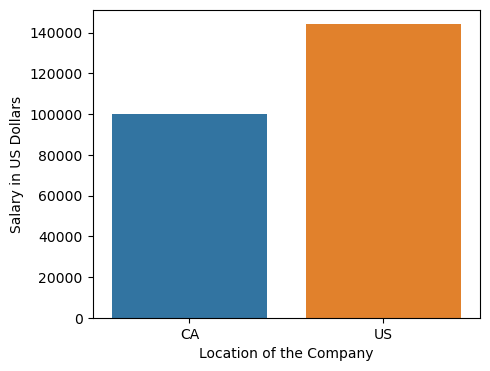

In [11]:
plt.figure(figsize=(5,4))
ax_NA = sns.barplot(data=dfMeanNorthAmerica, x="company_location", y="salary_in_usd", order=dfMeanNorthAmerica.sort_values('salary_in_usd').company_location)
ax_NA.set(xlabel = 'Location of the Company', ylabel = 'Salary in US Dollars')
plt.show()

#### Sub Question 2: What are the salary levels of workers in Asia? 

Mean of all salaries in Asia:

In [12]:
dfMeanAsia = dfAsia.groupby('company_location').mean().reset_index()

dfMeanAsia

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/1173474950.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMeanAsia = dfAsia.groupby('company_location').mean().reset_index()


,company_location,salary_in_usd
0,AE,100000.000000
1,AS,18053.000000
2,AU,108042.666667
3,CN,71665.500000
4,IL,119059.000000
5,IN,28581.750000
6,IQ,100000.000000
7,IR,4000.000000
8,JP,114127.333333
9,MY,40000.000000


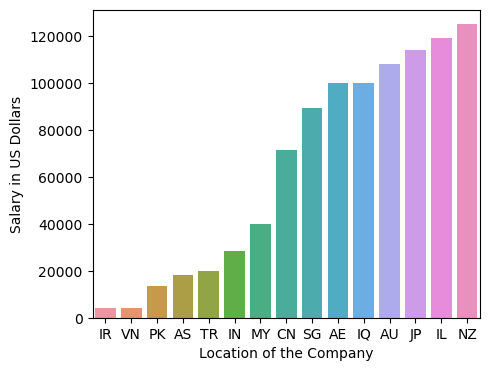

In [13]:
plt.figure(figsize=(5,4))
ax_AS = sns.barplot(data=dfMeanAsia, x="company_location", y="salary_in_usd", order=dfMeanAsia.sort_values('salary_in_usd').company_location)
ax_AS.set(xlabel = 'Location of the Company', ylabel = 'Salary in US Dollars')
plt.show()

#### Sub Question 3: What are the salary levels of workers in Europe? 

Mean of all salaries in Europe:

In [14]:
dfMeanEurope = dfEurope.groupby('company_location').mean().reset_index()

dfMeanEurope

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2086316986.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMeanEurope = dfEurope.groupby('company_location').mean().reset_index()


,company_location,salary_in_usd
0,AT,72920.750000
1,BE,85699.000000
2,CH,64114.000000
3,CZ,50937.000000
4,DE,81887.214286
5,DK,54386.333333
6,EE,32974.000000
7,ES,53060.142857
8,FR,63970.666667
9,GB,81583.042553


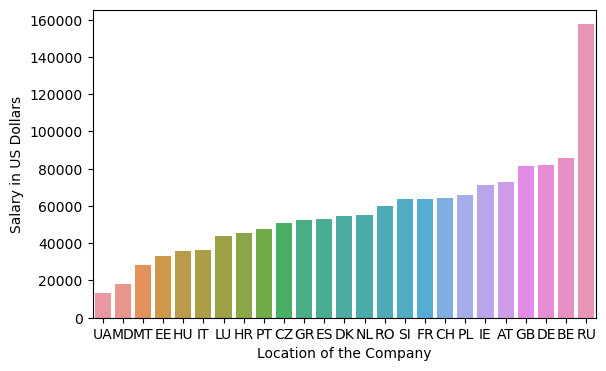

In [15]:
plt.figure(figsize=(6.5,4))
ax_EU = sns.barplot(data=dfMeanEurope, x="company_location", y="salary_in_usd", order=dfMeanEurope.sort_values('salary_in_usd').company_location)
ax_EU.set(xlabel = 'Location of the Company', ylabel = 'Salary in US Dollars')
plt.show()

#### Sub Question 4: What are the salary levels of workers in Latin America? 

Mean of all salaries in South America:

In [16]:
dfMeanLatinAmerica = dfLatinAmerica.groupby('company_location').mean().reset_index()

dfMeanLatinAmerica

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/1389169812.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMeanLatinAmerica = dfLatinAmerica.groupby('company_location').mean().reset_index()


,company_location,salary_in_usd
0,BR,18602.666667
1,CL,40038.000000
2,CO,21844.000000
3,HN,20000.000000
4,MX,32123.333333


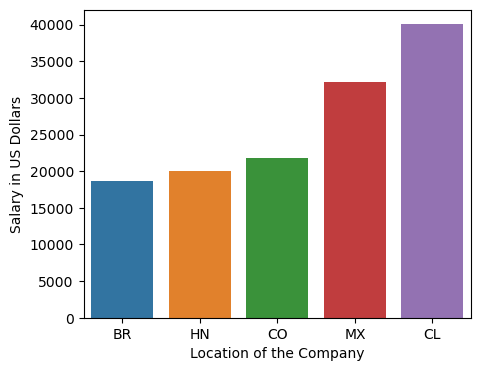

In [17]:
plt.figure(figsize=(5,4))
ax_SA = sns.barplot(data=dfMeanLatinAmerica, x="company_location", y="salary_in_usd", order=dfMeanLatinAmerica.sort_values('salary_in_usd').company_location)
ax_SA.set(xlabel = 'Location of the Company', ylabel = 'Salary in US Dollars')
plt.show()

#### Sub Question 5: What are the salary levels of workers in Africa? 

Mean of all salaries in Africa:

In [18]:
dfMeanAfrica = dfAfrica.groupby('company_location').mean().reset_index()

dfMeanAfrica

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/1165368830.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMeanAfrica = dfAfrica.groupby('company_location').mean().reset_index()


,company_location,salary_in_usd
0,DZ,100000.0
1,KE,9272.0
2,NG,30000.0


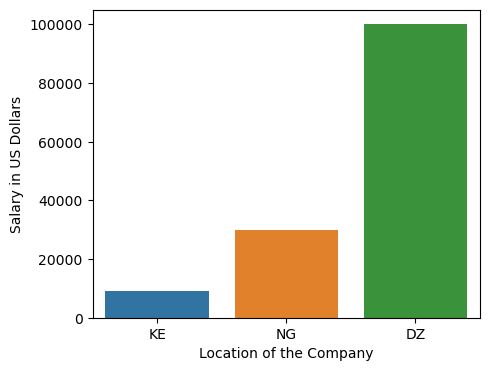

In [19]:
plt.figure(figsize=(5,4))
ax_AF = sns.barplot(data=dfMeanAfrica, x="company_location", y="salary_in_usd", order=dfMeanAfrica.sort_values('salary_in_usd').company_location)
ax_AF.set(xlabel = 'Location of the Company', ylabel = 'Salary in US Dollars')
plt.show()

#### barplot of different salary levels in all countries

Mean of all salaries in All countries:

In [20]:
dfMeanWorld = dfWorld.groupby('company_location').mean().reset_index()

dfMeanWorld

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/889237453.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMeanWorld = dfWorld.groupby('company_location').mean().reset_index()


,company_location,salary_in_usd
0,AE,100000.000000
1,AS,18053.000000
2,AT,72920.750000
3,AU,108042.666667
4,BE,85699.000000
5,BR,18602.666667
6,CA,99823.733333
7,CH,64114.000000
8,CL,40038.000000
9,CN,71665.500000


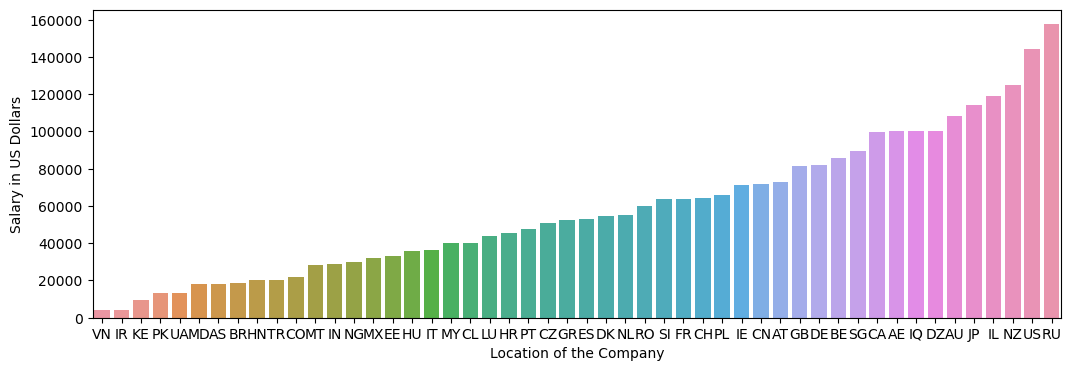

In [21]:
plt.figure(figsize=(12.5,4))
ax_WR = sns.barplot(data=dfMeanWorld, x="company_location", y="salary_in_usd", order=dfMeanWorld.sort_values('salary_in_usd').company_location)
ax_WR.set(xlabel = 'Location of the Company', ylabel = 'Salary in US Dollars')
plt.show()

## 5. Summary of findings

##### 1. Plot 1: salary levels of workers in United States and Canada
There is a significant difference in salary levels between the United States and Canada. While there could be various underlying reasons, it could be argued that the large population of the data science field in the United States is a contributing factor. 

##### 2. Plot 2: salary levels of workers in Asia
For simplicity, I have included New Zealand and Australia in Asia. Thus, the highest salary level in Asia was New Zealand. However, if these two countries were excluded, Israel was the highest earning country in Asia. I assume that this occurs because there are many skilled workers in Israel. 

##### 3. Plot 3: salary levels of workers in Europe
For simplicity, I have included Russia in Europe. Thus, the highest salary level in Europe was Russia. However, if Russia was excluded, Belgium was the highest earning country in Europe. It can be predicted that this occurs because the cost of living in Belgium is higher than other countries in Europe. 

##### 4. Plot 4: salary levels of workers in Latin America
The highest salary level in Latin America was Chile. It can be explained through the Chilean governmet implementation to support innovation in the data science sector. 

##### 5. Plot 5: salary levels of workers in Africa
The highest salary level in Africa was Algeria. Since many African countries still does not have stable infrastructure, this could be the reason why companies in Algeria pays its workers the highest salary in the African continent. 

##### However, It is important to note that many variables, such as economic conditions and industry demand, may play a crucial role in the salary differences between these countries. It is also important to recognize that the salary gap, as education, experience, and skills also factor into determining job opportunities and compensation.

## 5. Next analysis plan

I have completed creating the six different EDA in different regions in this milestone. 
Since my main research question was answered in this milestone, I will add more subquestions in relation to the different job titles. I will compare job titles against different categories like salary, region, and experience level. At the end, I will connect my main research question to the following subquestions:
- Which job title is most prevalent in different regions
- What are the top job titles that earns highest 
- For each experience level, what are the most common job titles
- How much does workers in different regions earn on average if they are working: Completely remote, Partially remote, and Not remote. 


## Analysis 2: Analysis Pipeline

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load data

In [23]:
dfPipeline = pd.read_csv('../data/processed/ds_salaries_1.csv')

dfPipeline

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_region
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,Europe
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,Asia
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,Europe
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,Latin America
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,North America
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,North America
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,North America
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,North America


#### 2. Clean data

In [24]:
dfPipeline = dfPipeline.drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'company_size', 'experience_level', 'salary_currency', 'salary'])
dfPipeline

,salary_in_usd,remote_ratio,company_location,company_region
0,79833,0,DE,Europe
1,260000,0,JP,Asia
2,109024,50,GB,Europe
3,20000,0,HN,Latin America
4,150000,50,US,North America
...,...,...,...,...
602,154000,100,US,North America
603,126000,100,US,North America
604,129000,0,US,North America
605,150000,100,US,North America


#### 3. Process data

In [25]:
dfPipeline['remote_ratio'] = dfPipeline['remote_ratio'].replace(0, "Not remote").replace(50, "Partially remote").replace(100, "Fully remote")

dfPipeline

,salary_in_usd,remote_ratio,company_location,company_region
0,79833,Not remote,DE,Europe
1,260000,Not remote,JP,Asia
2,109024,Partially remote,GB,Europe
3,20000,Not remote,HN,Latin America
4,150000,Partially remote,US,North America
...,...,...,...,...
602,154000,Fully remote,US,North America
603,126000,Fully remote,US,North America
604,129000,Not remote,US,North America
605,150000,Fully remote,US,North America


#### 4. Wrangle data

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/3550454351.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfNA = dfNA.groupby("remote_ratio").mean().reset_index()


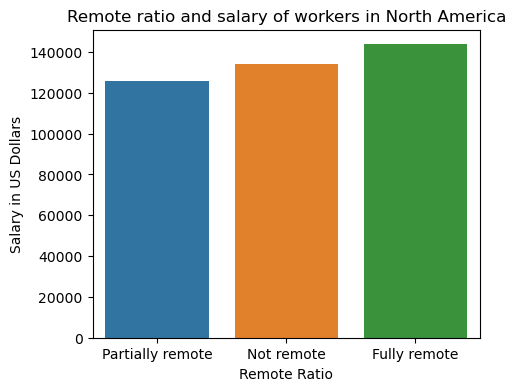

In [26]:
dfNA = dfPipeline.loc[(df["company_region"] == "North America")]

dfAS = dfPipeline.loc[(df['company_region'] == "Asia") | (df['company_region'] == "Middle East") | (df['company_region'] == "Oceania")]

dfEU = dfPipeline.loc[(df['company_region'] == "Europe")]

dfLA = dfPipeline.loc[(df['company_region'] == "Latin America")]

dfAF = dfPipeline.loc[(df['company_region'] == "Africa")]

# Remote ratio and salary of workers in North America
dfNA = dfNA.groupby("remote_ratio").mean().reset_index()

plt.figure(figsize=(5,4))
ax_NA = sns.barplot(data=dfNA, x="remote_ratio", y="salary_in_usd", order=dfNA.sort_values('salary_in_usd').remote_ratio)
ax_NA.set(xlabel = 'Remote Ratio', ylabel = 'Salary in US Dollars', title = "Remote ratio and salary of workers in North America")
plt.show()

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/3203265188.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfAS = dfAS.groupby("remote_ratio").mean().reset_index()


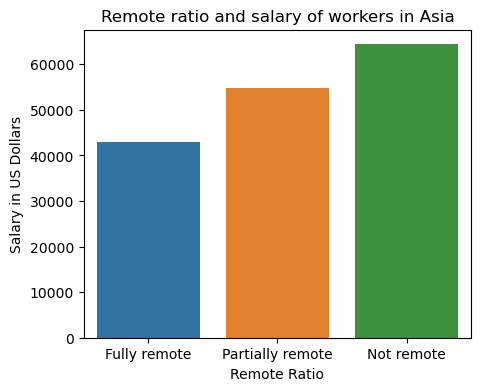

In [27]:
# Remote ratio and salary of workers in Asia
dfAS = dfAS.groupby("remote_ratio").mean().reset_index()

plt.figure(figsize=(5,4))
ax_AS = sns.barplot(data=dfAS, x="remote_ratio", y="salary_in_usd", order=dfAS.sort_values('salary_in_usd').remote_ratio)
ax_AS.set(xlabel = 'Remote Ratio', ylabel = 'Salary in US Dollars', title = "Remote ratio and salary of workers in Asia")
plt.show()

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/525171369.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfEU = dfEU.groupby("remote_ratio").mean().reset_index()


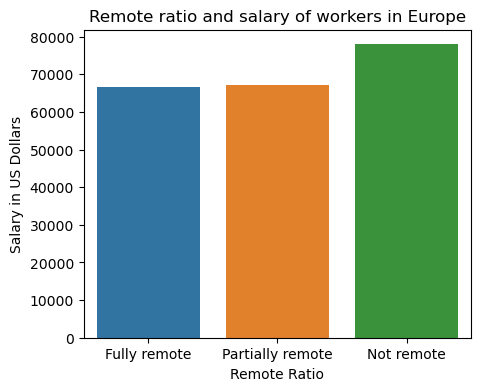

In [28]:
# Remote ratio and salary of workers in Europe
dfEU = dfEU.groupby("remote_ratio").mean().reset_index()

plt.figure(figsize=(5,4))
ax_EU = sns.barplot(data=dfEU, x="remote_ratio", y="salary_in_usd", order=dfEU.sort_values('salary_in_usd').remote_ratio)
ax_EU.set(xlabel = 'Remote Ratio', ylabel = 'Salary in US Dollars', title = "Remote ratio and salary of workers in Europe")
plt.show()

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/1616722219.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfLA = dfLA.groupby("remote_ratio").mean().reset_index()


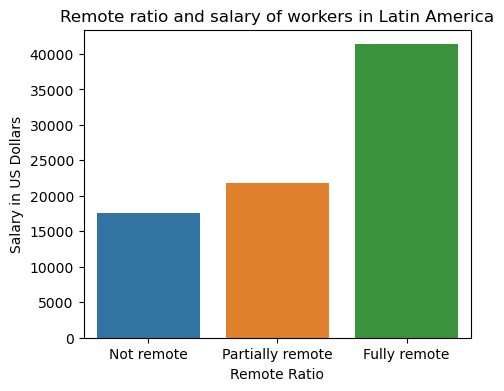

In [29]:
# Remote ratio and salary of workers in Latin America
dfLA = dfLA.groupby("remote_ratio").mean().reset_index()

plt.figure(figsize=(5,4))
ax_LA = sns.barplot(data=dfLA, x="remote_ratio", y="salary_in_usd", order=dfLA.sort_values('salary_in_usd').remote_ratio)
ax_LA.set(xlabel = 'Remote Ratio', ylabel = 'Salary in US Dollars', title = "Remote ratio and salary of workers in Latin America")
plt.show()

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2507505174.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfAF = dfAF.groupby("remote_ratio").mean().reset_index()


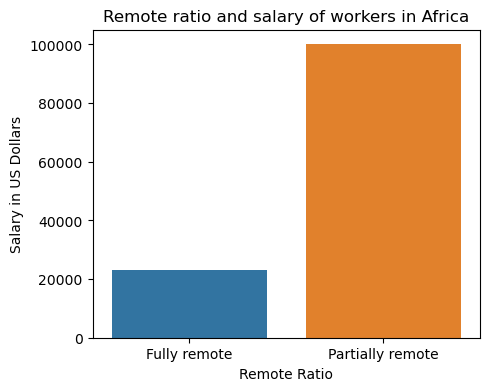

In [30]:
# Remote ratio and salary of workers in Africa
dfAF = dfAF.groupby("remote_ratio").mean().reset_index()

plt.figure(figsize=(5,4))
ax_AF = sns.barplot(data=dfAF, x="remote_ratio", y="salary_in_usd", order=dfAF.sort_values('salary_in_usd').remote_ratio)
ax_AF.set(xlabel = 'Remote Ratio', ylabel = 'Salary in US Dollars', title = "Remote ratio and salary of workers in Africa")
plt.show()

## Method Chaining

In [31]:
dfNA = (
pd.read_csv("../data/processed/ds_salaries_1.csv")
    .drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'company_size', 'experience_level', 'salary_currency', 'salary'])
    .assign(remote_ratio = lambda x : x['remote_ratio'].replace(0, "Not remote").replace(50, "Partially remote").replace(100, "Fully remote"))
    .groupby("remote_ratio")
    .mean()
    .reset_index()
)

dfNA

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/3955970144.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,122457.454068
1,Not remote,106354.622047
2,Partially remote,80823.030303


In [32]:
dfAS = (
pd.read_csv("../data/processed/ds_salaries_1.csv")
    .drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'company_size', 'experience_level', 'salary_currency', 'salary'])
    .assign(remote_ratio = lambda x : x['remote_ratio'].replace(0, "Not remote").replace(50, "Partially remote").replace(100, "Fully remote"))
    .groupby("remote_ratio")
    .mean()
    .reset_index()
)

dfNA

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/3216163311.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,122457.454068
1,Not remote,106354.622047
2,Partially remote,80823.030303


In [33]:
dfEU = (
pd.read_csv("../data/processed/ds_salaries_1.csv")
    .drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'company_size', 'experience_level', 'salary_currency', 'salary'])
    .assign(remote_ratio = lambda x : x['remote_ratio'].replace(0, "Not remote").replace(50, "Partially remote").replace(100, "Fully remote"))
    .groupby("remote_ratio")
    .mean()
    .reset_index()
)

dfNA

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/3083425929.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,122457.454068
1,Not remote,106354.622047
2,Partially remote,80823.030303


In [34]:
dfLA = (
pd.read_csv("../data/processed/ds_salaries_1.csv")
    .drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'company_size', 'experience_level', 'salary_currency', 'salary'])
    .assign(remote_ratio = lambda x : x['remote_ratio'].replace(0, "Not remote").replace(50, "Partially remote").replace(100, "Fully remote"))
    .groupby("remote_ratio")
    .mean()
    .reset_index()
)

dfNA

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2747293609.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,122457.454068
1,Not remote,106354.622047
2,Partially remote,80823.030303


In [35]:
dfAF = (
pd.read_csv("../data/processed/ds_salaries_1.csv")
    .drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'company_size', 'experience_level', 'salary_currency', 'salary'])
    .assign(remote_ratio = lambda x : x['remote_ratio'].replace(0, "Not remote").replace(50, "Partially remote").replace(100, "Fully remote"))
    .groupby("remote_ratio")
    .mean()
    .reset_index()
)

dfNA

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/1010560371.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,122457.454068
1,Not remote,106354.622047
2,Partially remote,80823.030303


## Method Chain to function

In [36]:
def load_and_process(path, name):

    df1 = (
    pd.read_csv("../data/processed/ds_salaries_1.csv")
    .drop(columns=['work_year', 'employment_type', 'job_title', 'employee_residence', 'company_size', 'experience_level', 'salary_currency', 'salary'])
    .loc[lambda df: df["company_region"] == name]
    )
    df2 = (
          df1
          .assign(remote_ratio = lambda x : x['remote_ratio'].replace(0, "Not remote").replace(50, "Partially remote").replace(100, "Fully remote"))
          .groupby("remote_ratio")
          .mean()
          .reset_index()
      )

    return df2 

In [37]:
load_and_process("../data/processed/ds_salaries_1.csv", "North America")

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2639470309.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,143703.473684
1,Not remote,134095.630137
2,Partially remote,125550.333333


In [38]:
load_and_process("../data/processed/ds_salaries_1.csv", "Asia")

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2639470309.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,24013.076923
1,Not remote,64502.833333
2,Partially remote,46242.076923


In [39]:
load_and_process("../data/processed/ds_salaries_1.csv", "Europe")

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2639470309.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,66721.260870
1,Not remote,77964.028571
2,Partially remote,67108.603774


In [40]:
load_and_process("../data/processed/ds_salaries_1.csv", "Latin America")

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2639470309.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,41346.0
1,Not remote,17635.6
2,Partially remote,21844.0


In [41]:
load_and_process("../data/processed/ds_salaries_1.csv", "Africa")

/var/folders/k1/jx_20_9j3tv3q8fbsjpzv9rc0000gn/T/ipykernel_65276/2639470309.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,23090.666667
1,Partially remote,100000.000000


In [6]:
from codes import project_functions1
from codes import project_functions2 
from codes import project_functions3

path = "../data/processed/ds_salaries_1.csv"

dfMethod = project_functions2.load_and_process(path, "Asia")

dfMethod

/Users/imafukukokoro/Documents/data_301/project-group-group07/analysis/codes/project_functions2.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


,remote_ratio,salary_in_usd
0,Fully remote,122457.454068
1,Not remote,106354.622047
2,Partially remote,80823.030303


## Analysis

##### sub-question: How much does workers in different regions earn on average if they are working: Completely remote, Partially remote, and Not remote. 
- As seen from the dataframes, various conclusions has been displayed in 5 regions. 
	- In North America, workers who are working fully remotely earns the highest at average. However, there was only minor  difference.
    - In Asia, workers who are working not remotely earns the highest at average. 
    - In Europe, workers who are working not remotely earns the highest at average. Moreover, partially remote and fully remote workers earns about the same level. 
    - In Latin America, workers who are working fully remote significantly earns the highest at average. 
    - In Africa, workers who are working partialy remotely earns the highest at average. 
- However, it is important to note that in this dataset, there are many data gathered for workers who are in North American companies. In contrast, data in African, Latin American, and Asian countries are significantly less compared to Europe and North America. Specifically, there were no workers that works in African companies that are not remote. Thus, these numbers could not be accurate due to the limited number of data. 